**Univariate Selection**

In [11]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv("./mobile-price-classification/train.csv")
X = data.iloc[:,0:20]  #independent columns #predictor variables
y = data.iloc[:,-1]    #target variable/column i.e price range
#apply SelectKBest class to extract top 10 best features
kit = 20
bestfeatures = SelectKBest(score_func=chi2, k=kit)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(kit,'Score'))  #print 10 best features

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878
10             pc       9.186054
9         n_cores       9.097556
18   touch_screen       1.928429
5          four_g       1.521572
7           m_dep       0.745820
1            blue       0.723232
2     clock_speed       0.648366
3        dual_sim       0.631011
19           wifi       0.422091
17        three_g       0.327643


**Feature Importance**

/home/quantiphi/py3_kernel/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.06151752 0.01969935 0.0343456  0.01922529 0.03181582 0.01898175
 0.0380031  0.03168483 0.03961942 0.02883051 0.03313257 0.04734753
 0.04690707 0.39148024 0.03227022 0.03485024 0.03330045 0.01610918
 0.02052163 0.02035766]


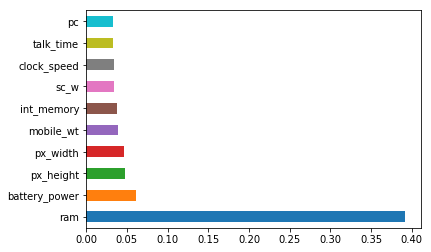

In [3]:
import pandas as pd
import numpy as np
data = pd.read_csv("./mobile-price-classification/train.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

**Correlation Matrix with Heatmap**

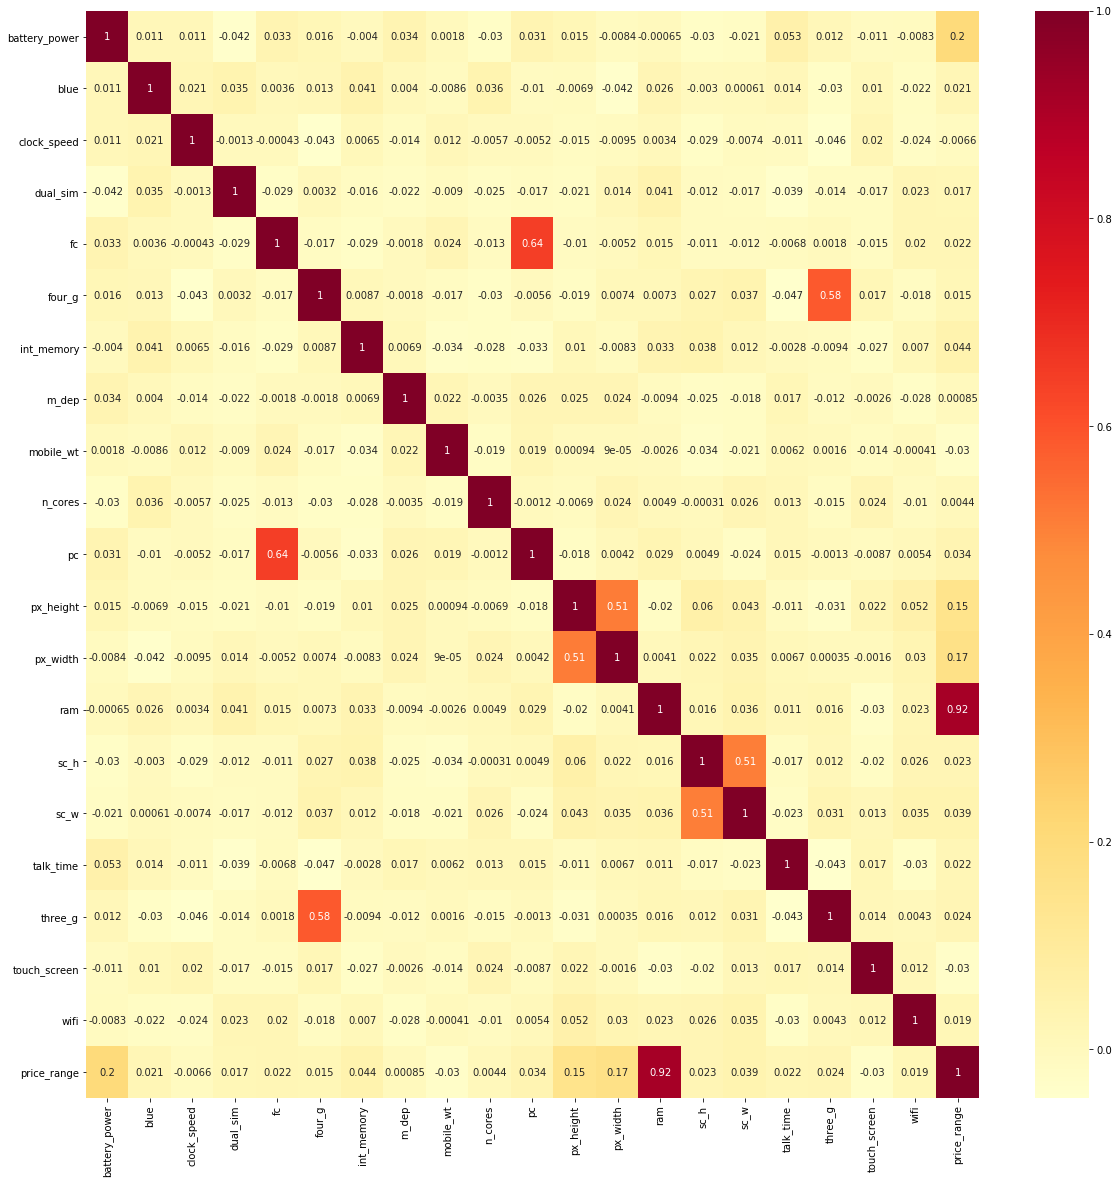

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("/home/quantiphi/Documents/DS_Trainer/Machine_Learning_Bootcamp/Session_4_EDA/Data/mobile_classification_train.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="YlOrRd")


Have a look at the last row i.e price range, see how the price range is correlated with other features, ram is the highly correlated with price range followed by battery power, pixel height and width while m_dep, clock_speed and n_cores seems to be least correlated with price_range.